In [448]:
# added this to get tab-complete working on theta
# %config Completer.use_jedi = False
import os,sys,json,time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing as mp
import plotly
import plotly.express as px 


### Loading in dataset

In [408]:
base_path = '/Users/tpapka/Summer2025/module_data/pythonlogging/module_usage'
check_for_modules = ['tensorflow','torch','horovod','pandas','matplotlib','h5py','sklearn','numpy','scipy','balsam']

In [409]:
#dataset = pd.read_csv('data_processing/output2.csv.gz',compression='gzip')
dataset = pd.read_csv('/Users/tpapka/Summer2025/module_data/pythonlogging/module_usage/output.csv.gz',compression='gzip')


In [410]:
dataset['modules'] = dataset['modules'].str.replace("'",'"').apply(json.loads)
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])


### Expand dataset so each module has its own row

In [411]:
dataset.explode('modules')

,hostname,hpcname,cooley,thetagpu,thetaknl,filename,source,timestamp,modules,source_id
0,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.2170507.23.46.39.756918,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:46:39.756918,_distutils_hack,4
0,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.2170507.23.46.39.756918,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:46:39.756918,ruamel,4
0,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.2170507.23.46.39.756918,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:46:39.756918,zipimport,4
1,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.1512791.23.19.19.337834,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:19:19.337834,_distutils_hack,4
1,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.1512791.23.19.19.337834,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:19:19.337834,ruamel,4
...,...,...,...,...,...,...,...,...,...,...
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,ipaddress,10
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,_typing,10
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,boltons,10
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,zipimport,10


In [445]:
conda_env = '/lus/theta-fs0/software/applications/conda'
dataset['conda'] = dataset['source'].apply(lambda x: 'yes' if conda_env in x else 'no')
dataset

,hostname,hpcname,cooley,thetagpu,thetaknl,filename,source,timestamp,modules,source_id,date,category,conda
0,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.2170507.23.46.39.756918,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:46:39.756918,_distutils_hack,4,2025-05-19,stdlibs,no
0,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.2170507.23.46.39.756918,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:46:39.756918,ruamel,4,2025-05-19,parsing,no
0,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.2170507.23.46.39.756918,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:46:39.756918,zipimport,4,2025-05-19,stdlibs,no
1,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.1512791.23.19.19.337834,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:19:19.337834,_distutils_hack,4,2025-05-19,stdlibs,no
1,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.1512791.23.19.19.337834,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:19:19.337834,ruamel,4,2025-05-19,parsing,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,ipaddress,10,2025-05-09,stdlibs,yes
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,_typing,10,2025-05-09,stdlibs,yes
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,boltons,10,2025-05-09,utilities,yes
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,zipimport,10,2025-05-09,stdlibs,yes


### Conda Env by day May 2025

In [457]:
conda_env_count = dataset.groupby(['date','conda'])['conda'].count().rename('count').reset_index()
conda_env_count.sort_values('date')


fig = px.bar(x = conda_env_count['date'], y = conda_env_count['count'], color=conda_env_count['conda'], title='Conda Env Y/N May 2025', labels= {
   'x':'Date',
   'y':'Count'
}
)
fig.show()

### Create two lists one for conda env and one for others

In [462]:
conda_only = dataset[dataset['conda'] == 'yes']

conda_mod_list = []
for i in conda_only['modules'].unique():
   conda_mod_list.append(i)

conda_mod_list

other_env_only = dataset[dataset['conda'] == 'no']

other_mod_list = []
for i in other_env_only['modules'].unique():
   other_mod_list.append(i)

other_mod_list

dif_list = []
for i in other_mod_list:
   if i not in conda_mod_list:
      dif_list.append(i)
dif_list

['pyannote',
 'uncertainties',
 'cupyx',
 'cupy',
 'donfig',
 'crc32c',
 'numcodecs',
 'fastrlock',
 'cupy_backends',
 'zarr',
 'rapids_dask_dependency',
 '_numba_cuda_redirector',
 'tensorboard',
 'backports',
 'more_itertools',
 '_virtualenv',
 'httpcore',
 'setproctitle',
 'h11',
 'jaraco',
 'torchmetrics',
 'keras',
 'xgboost',
 'regex',
 'flatbuffers',
 'hjson',
 'h5py',
 'cpuinfo',
 'pytorch_lightning',
 'cycler',
 'tensorflow',
 'lightning_fabric',
 'deepspeed',
 '_statistics',
 'kiwisolver',
 'statistics',
 'matplotlib',
 'lightning_utilities',
 'namex',
 'pydantic',
 '_ruamel_yaml',
 'scikits',
 'sphinxcontrib',
 'propcache',
 'aiohappyeyeballs',
 'attrs',
 'electrolyte_fm',
 'typeshed_client',
 'docstring_parser',
 'lightning',
 '_jsonnet',
 'jsonargparse',
 'mdurl',
 'typer',
 'uc_micro',
 'linkify_it',
 'shellingham',
 'markdown_it',
 'submit',
 'rdkit',
 'fused_lamb',
 'smirk',
 'pydevd_plugins',
 'tornado',
 '_pydev_bundle',
 'debugpy',
 '_curses',
 'pydevd_file_utils',
 

In [507]:
dif_dataset = dataset
dif_dataset['dif'] = dif_dataset['modules'].apply(lambda x: 'yes' if any(item in x for item in dif_list) else 'no')

dif_dataset = dif_dataset[dif_dataset['dif'] == 'yes']
dif_cat_count = dif_dataset.groupby(['category', 'date',])['category'].count().rename('count').reset_index()


### Bar chart of missing packages May 2025

In [508]:

fig = px.bar(x = dif_cat_count['date'], y = dif_cat_count['count'], color=dif_cat_count['category'], color_discrete_sequence=px.colors.qualitative.Alphabet ,title = 'The Missing Pacakges by Category May 2025',
             labels= {
                'x':'Date',
                'y':'Count',
                'color':'Categories'
             })
fig.show()

fig.write_html('/Users/tpapka/Summer2025/PyModuleSnooper/TheMissingPacakgesbyCategoryMay2025.html')

### Pi chart missing categories May 2025

In [531]:
dif_dataset

dif_cat = dif_dataset.groupby('category')['category'].count().rename('count').reset_index()


fig = px.pie(dif_cat, values='count',names='category', title = 'Missing Categories May 2025')
fig.show()

fig.write_html("/Users/tpapka/Summer2025/PyModuleSnooper/MissingCategoriesPIMay2025.html")

### Pi chart Ai that is missing May 2025

In [534]:
dif_ai = dif_dataset[dif_dataset['category'] == 'ai']
dif_ai = dif_ai.groupby('modules')['modules'].count().rename('count').reset_index()
fig = px.pie(dif_ai,values='count',names='modules',title='Ai Not Included in Conda May 2025')
fig.show()
fig.write_html("/Users/tpapka/Summer2025/PyModuleSnooper/MissingAIPIMay2025.html")

### Pi chart performance that is missing May 2025

In [533]:
dif_performance = dif_dataset[dif_dataset['category'] == 'performance']
dif_performance = dif_performance.groupby('modules')['modules'].count().rename('count').reset_index()
fig = px.pie(dif_performance,values='count',names='modules',title='Performance Not Included in Conda May 2025')
fig.show()
fig.write_html("/Users/tpapka/Summer2025/PyModuleSnooper/MissingPerformancePIMay2025.html")

### Create date col and look at May first data

In [412]:
dataset['date'] = dataset['timestamp'].dt.date
dataset['date'] = pd.to_datetime(dataset['date'])

date_modules = dataset[['date','modules']]
date_modules = date_modules.explode('modules')


mayFirst = date_modules[date_modules['date'] == "2025-05-01"]

mayFirst.drop('date', axis=1)

module_counts = mayFirst['modules'].value_counts().reset_index()

module_counts.columns = ['module', 'count'] 

module_counts

,module,count
0,_distutils_hack,119
1,zipimport,119
2,ruamel,119
3,ipaddress,107
4,_typing,107
...,...,...
69,archspec,7
70,conda_build,7
71,conda_package_handling,7
72,conda_content_trust,7


### Graph module uses on May 1st 2025

In [447]:
import plotly.express as px 
fig = px.scatter(x=module_counts['module'], y=module_counts['count'], title="Most Used Modules on May 1st 2025",
                 labels= {
                    "x": "Modules",
                    "y": "Count"
                 })
fig.show()
fig.write_html('/Users/tpapka/Summer2025/PyModuleSnooper/mayFirstScatter.html')

fig = px.bar(x=module_counts['module'], y=module_counts['count'], title="Most Used Modules on May 1st 2025",
                 labels= {
                    "x": "Modules",
                    "y": "Count"
                 })
fig.show()
fig.write_html('/Users/tpapka/Summer2025/PyModuleSnooper/mayFirstBar.html')

### Create list of modules

In [438]:
dataset = dataset.explode('modules')
module_counts_may = dataset['modules'].value_counts().reset_index()

module_counts_may.columns = ['module', 'count'] 
mod_list = module_counts_may['module'].values.tolist()
len(mod_list)


268

### Most used modules in May 2025

In [415]:
fig = px.scatter(x=module_counts_may['module'], y=module_counts_may['count'], title="Most Used Modules in May 2025",
                 labels= {
                    "x": "Modules",
                    "y": "Count"
                 })
fig.show()
fig.write_html('/Users/tpapka/Summer2025/PyModuleSnooper/mayCountsScatter.html')

fig = px.bar(x=module_counts_may['module'], y=module_counts_may['count'], title="Most Used Modules in May 2025",
                 labels= {
                    "x": "Modules",
                    "y": "Count"
                 })
fig.show()
fig.write_html('/Users/tpapka/Summer2025/PyModuleSnooper/mayCountsBar.html')

### Open new catergories json file

In [416]:
from collections import defaultdict


with open('/Users/tpapka/Summer2025/PYMODULESNOOPER/newCatergories.json') as file:
   categories =json.load(file)
   
library_to_categories = defaultdict(list)
for category, libs in categories.items():
    for lib in libs:
        library_to_categories[lib].append(category)

duplicates = {lib: cats for lib, cats in library_to_categories.items() if len(cats) > 1}

if duplicates:
    print("Duplicates found:")
    for lib, cats in sorted(duplicates.items()):
        print(f"  '{lib}' appears in categories: {', '.join(cats)}")
else:
    print("No duplicates found.")

No duplicates found.


### Connect modules to a given category

In [ ]:
module_to_category = {}
for category, modules in categories.items():
    for module in modules:
        module_to_category[module] = category

dataset['category'] = dataset['modules'].map(module_to_category).fillna('unknown')
dataset

,hostname,hpcname,cooley,thetagpu,thetaknl,filename,source,timestamp,modules,source_id,date,category
0,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.2170507.23.46.39.756918,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:46:39.756918,_distutils_hack,4,2025-05-19,stdlibs
0,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.2170507.23.46.39.756918,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:46:39.756918,ruamel,4,2025-05-19,parsing
0,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.2170507.23.46.39.756918,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:46:39.756918,zipimport,4,2025-05-19,stdlibs
1,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.1512791.23.19.19.337834,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:19:19.337834,_distutils_hack,4,2025-05-19,stdlibs
1,polaris-login-02,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/19/polaris-login-02.1512791.23.19.19.337834,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,2025-05-19 23:19:19.337834,ruamel,4,2025-05-19,parsing
...,...,...,...,...,...,...,...,...,...,...,...,...
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,ipaddress,10,2025-05-09,stdlibs
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,_typing,10,2025-05-09,stdlibs
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,boltons,10,2025-05-09,utilities
2816,x3006c0s19b1n0,NaN,0,0,0,/lus/eagle/logs/pythonlogging/module_usage/2025/05/09/x3006c0s19b1n0.3916397.14.32.37.278283,/lus/theta-fs0/software/applications/conda/2024-04-29/mconda3/bin/python,2025-05-09 14:32:37.278283,zipimport,10,2025-05-09,stdlibs


### Create counts for each category type

In [418]:
countByCategory = dataset.groupby('category')['category'].count()
countByCategory = countByCategory.rename('count').to_frame().reset_index()
countByCategory.columns = ['category','count']
countByCategory = countByCategory.sort_values('count',ascending=False)
countByCategory


,category,count
8,stdlibs,21920
12,utilities,7448
6,parsing,6019
7,performance,2683
4,interactive,2525
0,ai,1900
2,config,1673
9,testing,1640
13,workflows,1634
5,io,1328


### Category count May 2025 (Bar Chart)

In [419]:
fig = px.bar(x=countByCategory['category'], y=countByCategory['count'], title="Category Count May 2025",
             labels = {
                "x": "Module Category",
                "y": "Count"
             })
fig.show()
fig.write_html('/Users/tpapka/Summer2025/PyModuleSnooper/ModuleCategoryCountMay2025Bar.html')

### Look at unknown modules 

In [420]:
unknown = dataset[dataset['category'] == "unknown"]
unknown

unknown = unknown.groupby('modules')['modules'].count()
unknown.sort_values()

countByCategory['category'] = countByCategory['category'].astype('string')


In [421]:
unknown

Series([], Name: modules, dtype: int64)

### Category Count by day for May 2025

In [422]:
countByCategory = dataset.groupby(['category','date'])['category'].count()
countByCategory = countByCategory.rename('count').to_frame().reset_index()
countByCategory.columns = ['category','date','count']
countByCategory = countByCategory.sort_values('count',ascending=False)
countByCategory

fig = px.scatter(x= countByCategory['date'], y= countByCategory['count'], color=countByCategory['category'], title="Category Count by Day for May 2025",
                 labels={
                 "x":"Date",
                 "y":"Count"})
fig.show()

# countByDayMay = dataset.groupby('date')['modules'].count()
# countByDayMay = countByDayMay.to_frame().reset_index()
# countByDayMay.columns = ['date','count']

### Count by day in May dataset creation

In [423]:
dataset
countByDayMay = dataset.groupby('date')['modules'].count()
countByDayMay = countByDayMay.to_frame().reset_index()
countByDayMay.columns = ['date','count']
countByDayMay

,date,count
0,2025-05-01,2475
1,2025-05-02,3496
2,2025-05-03,632
3,2025-05-04,3240
4,2025-05-05,456
5,2025-05-06,849
6,2025-05-07,899
7,2025-05-08,1677
8,2025-05-09,672
9,2025-05-10,373


### Each category in May 2025 and Viz

In [439]:
ai = dataset[dataset['category'] == 'ai']
ai_mod = ai.groupby('modules')['modules'].count()
ai_mod = ai_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
ai_mod
fig1 = px.bar(x = ai_mod['modules'], y = ai_mod['count'], title='AI Module Counts in May 2025', 
              labels={'x':'Modules','y':'Count'})
fig1.show()

io = dataset[dataset['category'] == 'io']
io_mod = io.groupby('modules')['modules'].count()
io_mod = io_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig2 = px.bar(x = io_mod['modules'], y = io_mod['count'], title='IO Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig2.show()

ds = dataset[dataset['category'] == 'ds']
ds_mod = ds.groupby('modules')['modules'].count()
ds_mod = ds_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig3 = px.bar(x = ds_mod['modules'], y = ds_mod['count'], title='Data Science Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig3.show()

performance = dataset[dataset['category'] == 'performance']
performance_mod = performance.groupby('modules')['modules'].count()
performance_mod = performance_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig4 = px.bar(x = performance_mod['modules'], y = performance_mod['count'], title='Performance Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig4.show()

workflows = dataset[dataset['category'] == 'workflows']
workflows_mod = workflows.groupby('modules')['modules'].count()
workflows_mod = workflows_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig5 = px.bar(x = workflows_mod['modules'], y = workflows_mod['count'], title='Workflows Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig5.show()

typing = dataset[dataset['category'] == 'typing']
typing_mod = typing.groupby('modules')['modules'].count()
typing_mod = typing_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig6 = px.bar(x = typing_mod['modules'], y = typing_mod['count'], title='Typing Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig6.show()

cli = dataset[dataset['category'] == 'cli']
cli_mod = cli.groupby('modules')['modules'].count()
cli_mod = cli_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig7 = px.bar(x = cli_mod['modules'], y = cli_mod['count'], title='Cli Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig7.show()

config = dataset[dataset['category'] == 'config']
config_mod = config.groupby('modules')['modules'].count()
config_mod = config_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig8 = px.bar(x = config_mod['modules'], y = config_mod['count'], title='Config Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig8.show()

interactive = dataset[dataset['category'] == 'interactive']
interactive_mod = interactive.groupby('modules')['modules'].count()
interactive_mod = interactive_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig9 = px.bar(x = interactive_mod['modules'], y = interactive_mod['count'], title='Interactive Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig9.show()

parsing = dataset[dataset['category'] == 'parsing']
parsing_mod = parsing.groupby('modules')['modules'].count()
parsing_mod = parsing_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig10 = px.bar(x = parsing_mod['modules'], y = parsing_mod['count'], title='Parsing Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig10.show()

utilities = dataset[dataset['category'] == 'utilities']
utilities_mod = utilities.groupby('modules')['modules'].count()
utilities_mod = utilities_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig11 = px.bar(x = utilities_mod['modules'], y = utilities_mod['count'], title='Utilities Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig11.show()


stdlibs = dataset[dataset['category'] == 'stdlibs']
stdlibs_mod = stdlibs.groupby('modules')['modules'].count()
stdlibs_mod = stdlibs_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
stdlibs_mod
fig12 = px.bar(x = stdlibs_mod['modules'], y = stdlibs_mod['count'], title='Standard Libraries Count in May 2025', 
              labels={'x':'Modules','y':'Count'})
fig12.show()


uncategorized = dataset[dataset['category'] == 'uncategorized']
uncategorized_mod = uncategorized.groupby('modules')['modules'].count()
uncategorized_mod = uncategorized_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig13 = px.bar(x = uncategorized_mod['modules'], y = uncategorized_mod['count'], title='Uncategorized Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})
fig13.show()

testing = dataset[dataset['category'] == 'testing']
testing_mod = testing.groupby('modules')['modules'].count()
testing_mod = testing_mod.rename('count').reset_index().sort_values(by='count',ascending=False)
fig14 = px.bar(x = testing_mod['modules'], y = testing_mod['count'], title='Testing Module Counts in May 2025',
             labels={'x':'Modules','y':'Count'})

fig14.show()




with open('mayCounts_IndividualCategories.html', 'a') as f:
    f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig4.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig5.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig6.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig7.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig8.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig9.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig10.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig11.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig12.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig13.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig14.to_html(full_html=False, include_plotlyjs='cdn'))



### Ai Mod Graph Displaying top 5

In [425]:
import plotly.graph_objects as go
ai_mod = ai.groupby(['modules','date'])['modules'].count().rename('count').reset_index()
ai_mod_top_5 = ai_mod.groupby('modules')['count'].sum().nlargest(5).index
ai_mod = ai_mod.sort_values(['modules','date'])


fig = go.Figure()

for mod in ai_mod_top_5:
   data = ai_mod[ai_mod['modules'] == mod]
   fig.add_trace(go.Scatter(
      x=data['date'],
      y=data['count'],
      mode='lines+markers',
      name=mod
   ))

for mod in ai_mod['modules'].unique():
   if mod not in ai_mod_top_5:
      data = ai_mod[ai_mod['modules'] == mod]
      fig.add_trace(go.Scatter(
         x=data['date'],
         y=data['count'],
         mode='markers',
         name=mod,
         showlegend=False
      ))

fig.update_layout(
    title='AI Module Counts in May 2025',
    xaxis_title='Date',
    yaxis_title='Count'
)

fig.show()

fig.write_html('/Users/tpapka/Summer2025/PyModuleSnooper/AiModCountWLineMay2025.html')


### IO Top 5 Module usage

In [426]:
io_mod = io.groupby(['modules','date'])['modules'].count().rename('count').reset_index()
io_mod_top_5 = io_mod.groupby('modules')['count'].sum().nlargest(5).index
io_mod.sort_values(['modules','date'])

fig = go.Figure()

for mod in io_mod_top_5:
   data = io_mod[io_mod['modules'] == mod]
   fig.add_trace(go.Scatter(
      x = data['date'],
      y = data['count'],
      mode = 'markers+lines',
      name = mod
   ))
for mod in io_mod['modules'].unique():
   if mod not in io_mod_top_5:
      data = io_mod[io_mod['modules'] == mod]
      fig.add_trace(go.Scatter(
         x = data['date'],
         y = data['count'],
         mode = 'markers',
         name = mod,
         showlegend=False
      ))
fig.update_layout(
   title = 'Top 5 IO Mods with Lines in May 2025',
   xaxis_title = 'Date',
   yaxis_title = 'Count'
)


fig.show()



### Parsing Top 5 Mod with Line graph May 2025

In [427]:
parsing_mod = parsing.groupby(['modules','date'])['modules'].count().rename('count').reset_index()
parsing_mod_top_5 = parsing_mod.groupby(['modules'])['count'].sum().nlargest(5).index
parsing_mod.sort_values(['modules','date'])

fig = go.Figure()

for mod in parsing_mod_top_5:
   data = parsing_mod[parsing_mod['modules'] == mod]
   fig.add_trace(go.Scatter(
      x = data['date'],
      y = data['count'],
      mode = 'markers+lines',
      name = mod
   ))

for mod in parsing_mod:
   if mod not in parsing_mod_top_5:
      data = parsing_mod[parsing_mod['modules'] == mod]
      fig.add_trace(go.Scatter(
         x = data['date'],
         y = data['count'],
         mode = 'markers',
         name = mod,
         showlegend=False
      ))

fig.update_layout(
   title = 'Top 5 Parsing Mods with Lines in May 2025',
   xaxis_title = 'Date',
   yaxis_title = 'Count'
)
fig.show()

### Module usage by day 2025

In [428]:
fig = px.scatter(x=countByDayMay['date'], y=countByDayMay['count'], title="Module Usage by Day in May 2025",
                 labels= {
                    "x": "Date",
                    "y": "Count"
                 })
fig.show()
fig.write_html('/Users/tpapka/Summer2025/PyModuleSnooper/ModuleCountByDayinMayScatter.html')


fig = px.bar(x=countByDayMay['date'], y=countByDayMay['count'], title="Module Usage by Day in May 2025",
             labels = {
                "x": "Date",
                "y": "Count"
             })
fig.show()
fig.write_html('/Users/tpapka/Summer2025/PyModuleSnooper/ModuleCountByDayinMayBar.html')

In [429]:
dataset.groupby(['source_id','source']).size().reset_index().rename(columns={0:'count'})

,source_id,source,count
0,0,/eagle/AXMAS-Reduction/sw/venvs/nxrefine/bin/python,984
1,1,/eagle/MDClimSim/rayandrew/dlens/venvs/mconda3/bin/python,2927
2,2,/grand/NeuroX/jubidubab/swiftv2_pt2.3.0/bin/python,15
3,3,/gpfs/mira-home/hereld/envs/polaris-bug/bin/python,189
4,4,/eagle/MDClimSim/Anirban/PyTorchTF_GPU_AB_sophia/bin/python,3701
5,5,/lus/eagle/projects/abir/venvs/ptydl20/bin/python,7
6,6,/lus/eagle/projects/FoundEpidem/xlian/conda/envs/genslm/bin/python,1426
7,7,/gpfs/mira-home/changwenxu/cloud/bin/python,105
8,8,/gpfs/mira-home/xuyangc/.conda/envs/pytorch/bin/python,221
9,9,/gpfs/mira-home/rafatspn/clemson/gc_gnn/bin/python,513


In [430]:
def plot_module_usage_by_day(dataset,module_list,colors=None):
    fig,ax = plt.subplots(1,figsize=(12,8),dpi=80)
    data = []
    for module in module_list:
        print(module)
        module_entries = dataset[dataset['modules'].apply(lambda x: module in x)]
        use_per_day = dataset['timestamp'].groupby(module_entries['timestamp'].dt.day).count()
        use_per_day = use_per_day.rename(module)
        data.append(use_per_day)
    data = pd.concat(data,axis=1)
    data.plot(kind='bar',ax=ax,color=colors)
    ax.set_xlabel('day')
    ax.set_yscale('log')
    ax.legend()
#     ax.set_xlim(1,31)
#     days = [ x for x in range(1,32) ]
#     ax.set_xticks(days)
#     ax.set_xticklabels(days)
    min_date = dataset['timestamp'].min()
    max_date = dataset['timestamp'].max()
    ax.set_title('Covers ' + str(min_date.date()) + ' to ' + str(max_date.date()))

def plot_source(dataset):
    fig,ax = plt.subplots(1,figsize=(12,8),dpi=80)
    newdata = dataset.groupby(['source_id','source']).size().reset_index().rename(columns={0:'count'})
    newdata[['source_id','count']].plot(x='source_id',y='count',kind='bar',ax=ax,logy=True)
    #dataset.groupby(dataset['source_id'])['timestamp'].count().plot(kind='bar',ax=ax,logy=True)
    ax.set_xlabel('python source module ID')
    min_date = dataset['timestamp'].min()
    max_date = dataset['timestamp'].max()
    ax.set_title('Covers ' + str(min_date.date()) + ' to ' + str(max_date.date()))
    pd.options.display.max_colwidth = 500
    print(newdata[['source_id','source']])

def plot_machine_by_day(dataset,machine_list,colors=None):
    fig,ax = plt.subplots(1,figsize=(12,8),dpi=80)
    data = []
    for machine in machine_list:
        machine_entries = dataset[dataset[machine] == 1]
        use_per_day = dataset['timestamp'].groupby(machine_entries['timestamp'].dt.day).count()
        use_per_day = use_per_day.rename(machine)
        data.append(use_per_day)
    data = pd.concat(data,axis=1)
    data.plot(kind='line',ax=ax,color=colors)
    ax.set_xlabel('day')
    ax.set_yscale('log')
    ax.legend()
    min_date = dataset['timestamp'].min()
    max_date = dataset['timestamp'].max()
    ax.set_title('Covers ' + str(min_date.date()) + ' to ' + str(max_date.date()))

def plot_most_used_modules(dataset,top_n=10):
    
    mods = dataset['modules']
    mod_dict = {}
    for modlist in mods:
        for entry in modlist:
            if entry in mod_dict.keys():
                mod_dict[entry] += 1
            else:
                mod_dict[entry] = 1
    
    ds = pd.DataFrame({'module':mod_dict.keys(),'occurance':mod_dict.values()})
    
    ds = ds.sort_values('occurance',ascending=False)
    
    fig,ax = plt.subplots(1,figsize=(12,8),dpi=80)
    ds[0:top_n].plot(kind='bar',ax=ax)
    ax.set_xlabel(f'top {top_n} modules')
    ax.set_ylabel('number of uses')
    ax.set_yscale('log')
    ax.set_xticklabels(ds['module'][0:top_n])
    
    min_date = dataset['timestamp'].min()
    max_date = dataset['timestamp'].max()
    ax.set_title('Covers ' + str(min_date.date()) + ' to ' + str(max_date.date()))
    
    return ds
    
    

balsam
tensorflow
torch


ValueError: cannot reindex on an axis with duplicate labels

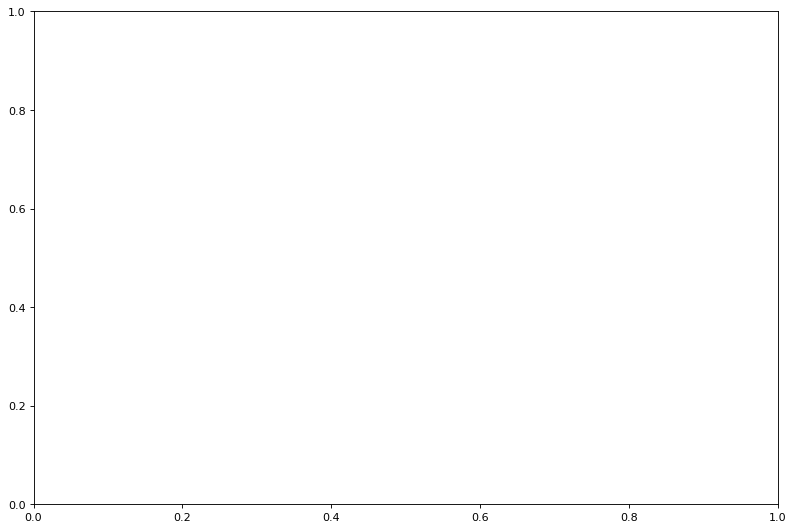

In [431]:
plot_module_usage_by_day(dataset,['balsam','tensorflow','torch','horovod'],
                         {'balsam':'green','tensorflow':'orange','torch':'red','horovod':'blue'})

In [ ]:
plot_source(dataset)

In [ ]:
plot_machine_by_day(dataset,['thetaknl','thetagpu'],{'thetaknl':'blue','thetagpu':'green'})

In [ ]:
x = plot_most_used_modules(dataset)

In [ ]:
plt.hist(dataset['timestamp'],bins=100)